#  Overview

The Terry Stops problem aims to predict the outcome of police stops based on reasonable suspicion using a classification model. The model considers various factors such as presence of weapons, time of day, and possibly gender and race of both the officer and the subject. However, the use of race and gender data raises ethical concerns and the importance of avoiding bias and discrimination must be taken into consideration. The goal of this model is to improve the efficiency and fairness of law enforcement actions, but the agencies must also monitor and address any potential biases.

# 1. Business Understanding


## 1.1. Problem
The Terry Stops presents a business opportunity to improve the efficiency and fairness of law enforcement actions. By developing a predictive model that can assist officers in determining the likelihood of an arrest being made during a Terry Stop, the law enforcement agencies can make informed decisions and potentially reduce the number of false arrests and incidents of police misconduct. However, it is important to approach this problem with caution and transparency, considering the ethical concerns raised by the use of gender and race data. The goal is to provide a tool that can help improve policing, while avoiding biases and discrimination.

## 1.2 Aim

The aim of this project is to build a classifier that can predict the outcome of a Terry Stop (whether an arrest was made or not) based on reasonable suspicion. This will be done by considering various factors such as the presence of weapons, time of day of the call, and other relevant information. The model will be designed to address the binary classification problem, with the goal of improving the efficiency and fairness of law enforcement actions.

## 1.3. 0bjectives
* To create a predictive model for Terry Stops that accurately predicts the outcome of the stop (arrest made or not)
* To take into consideration key factors such as the presence of weapons and the time of the call in the model
* To ensure that the model is ethically sound and avoids any biases or discrimination related to gender and race.

# 2. Data Understanding

## 2.1 Data Understanding
This dataset was provided by the City of Seattle and is managed by the Seattle Police Department. It was created on April 13, 2017 and last updated on February 6, 2023. The dataset contains **54873**, rows and **23** columns, each row representing a unique Terry Stop record as reported by the officer conducting the stop. The columns in the dataset include information about the subject of the stop, such as the perceived age group, perceived race, and perceived gender. 

The dataset also includes information about the officer, such as the officer's gender, race, and year of birth. Additionally, the dataset includes information about the resolution of the stop, any weapons found, the date and time the stop was reported, and information about the underlying Computer Aided Dispatch (CAD) event. The data is updated daily and is licensed under the public domain.

# 3. Requirements

* Data Preparation -> Loading Libraries -> Loading data -> Descriptive Exploration -> Data Cleaning -> Exploratory Descriptive Analysis (EDA) -> Pre-processing Data

* Modelling -> Train test split -> Logistic Regression -> K-Nearest -> Decision Tree -> Logistic Regression -> Random Forest
    
* Evaluation -> Classification Metrics -> Best Perfoming Model

* Conclusion -> Best Model
    
* Recommendation -> Most imporatnt features

# 4. Data Preparation

*  Update the Stop Resolution column to either be arrested (1) or not arrested (0):
*  Change the date column to datetime so we can work with it. Add in the month as a new column:
*  Group weapons into firearms vs. non-firearms vs. no weapon:
*  Change Officer year of bith to give the officer age:
*  Drop columns that we are not going to need:

* Converting categorical data to numeric format through label encoder

i) Loading Libraries -> 
ii) Loading data -> 
iii) Descriptive Exploration -> 
iv) Data Cleaning -> 
v) Exploratory Descriptive Analysis (EDA) -> 
vi) Pre-processing Data

### 4.1. Loading Libraries

In [48]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 4.2. Loading Data

In [49]:
# read the csv file to pandas data frame
Tery_stops_df = pd.read_csv("data/Terry_Stops.csv")

# preview the first 3 rows
Tery_stops_df.head(7)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,01:23:00.0000000,-,-,-,SOUTH PCT 3RD W - ROBERT,N,N,-,-,-
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 1ST W - LINCOLN,N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,C,C1
3,1 - 17,12771262575,20200000093264,12771309361,Arrest,-,8308,1987,M,Hispanic or Latino,...,01:56:17.0000000,"DISTURBANCE, MISCELLANEOUS/OTHER",--TRAFFIC - D.U.I.,ONVIEW,NaN,Y,N,West,Q,Q3
4,56 and Above,-1,20170000000086,227439,Field Contact,None,8376,1975,M,Hispanic or Latino,...,14:29:00.0000000,-,-,-,NORTH PCT 2ND W - JOHN,N,N,-,-,-
5,1 - 17,-1,20170000272079,289314,Offense Report,None,8409,1993,M,White,...,17:00:00.0000000,ROBBERY - IP/JO (INCLUDES STRONG ARM),--ROBBERY - STRONG ARM,911,NORTH PCT 2ND W - JOHN,N,N,North,J,J3
6,36 - 45,-1,20190000001386,549535,Field Contact,Lethal Cutting Instrument,8418,1984,M,White,...,17:13:00.0000000,-,-,-,WEST PCT 2ND W - D/M RELIEF,N,N,-,-,-


#### These are the  23 columns, with a concise explanation of the information contained in each column :

**Subject Age Group:** Subject Age Group (10 year increments) as reported by the officer.

**Subject ID:** Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

**GO/SC Num:** General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

**Terry Stop ID:** Key identifying unique Terry Stop reports.

**Stop Resolution:** Resolution of the stop as reported by the officer.

**Weapon Type:** Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

**Officer ID:** Key identifying unique officers in the dataset.

**Officer YOB:** Year of birth, as reported by the officer.

**Officer Gender:** Gender of the officer, as reported by the officer.

**Officer Race:** Race of the officer, as reported by the officer.

**Subject Perceived Race:** Perceived race of the subject, as reported by the officer.

**Subject Perceived Gender:** Perceived gender of the subject, as reported by the officer.

**Reported Date:** Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

**Reported Time:** Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

**Initial Call Type:** Initial classification of the call as assigned by 911.

**Final Call Type:** Final classification of the call as assigned by the primary officer closing the event.

**Call Type:** How the call was received by the communication center.

**Officer Squad:** Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

**Arrest Flag:** Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

**Frisk Flag:** Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

**Precinct:** Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Sector:** Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Beat:** Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.




### 4.3.  Descriptive Exploration
To summarizes the characteristics of a data set

In [50]:
# data shape
print(f"This dataset has {Tery_stops_df.shape[0]} rows and {Tery_stops_df.shape[1]} columns")

This dataset has 54873 rows and 23 columns


#### 4.3.1.  What are the datatype of columns ?

In [51]:
# # check number of categorical and numerical columns
def columns_dtypes(df):
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    
# call the function  
columns_dtypes(Tery_stops_df)

Numerical columns: 4
Categorical columns: 19


#### 4.3.2. Data set description

In [52]:
# describe the dataset
Tery_stops_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject ID,54873.0,4.733982e+09,8.203096e+09,-8.0,-1.000000e+00,-1.000000e+00,7.732994e+09,4.149222e+10
GO / SC Num,54873.0,2.018135e+13,8.883140e+10,-1.0,2.016000e+13,2.018000e+13,2.020000e+13,2.023000e+13
Terry Stop ID,54873.0,7.648965e+09,1.171084e+10,28020.0,2.123010e+05,4.677610e+05,1.279593e+10,4.149624e+10
Officer YOB,54873.0,1.983519e+03,9.508902e+00,1900.0,1.979000e+03,1.986000e+03,1.990000e+03,2.000000e+03


>Most of the figures are too large to give a clear description but this before any scaling.

#### 4.3.3 Target column distribution


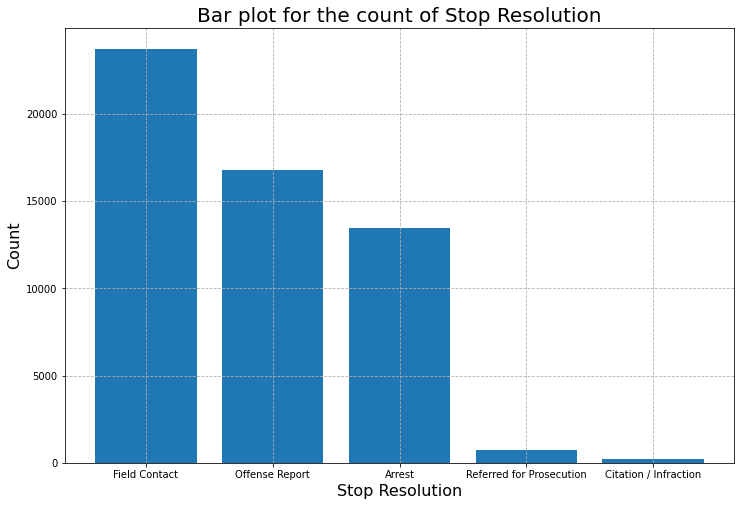

In [53]:
def plot_value_counts(df, col_name):
    # Count the number of unique values for the column "Stop Resolution"
    value_counts = df[col_name].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(12,8))
    plt.bar(value_counts.index, value_counts.values)
    
    
    # Label the x and y axis
    plt.title("Bar plot for the count of " + col_name, fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Count", fontsize=16)

    # Add grid
    plt.grid(True, linestyle='--')
    
    # Show the plot
    plt.show()

# call the function    
plot_value_counts(Tery_stops_df,"Stop Resolution")

>Field contact dominated the stop resolution as repoted by officer

#### 4.3.4 Categorical Columns

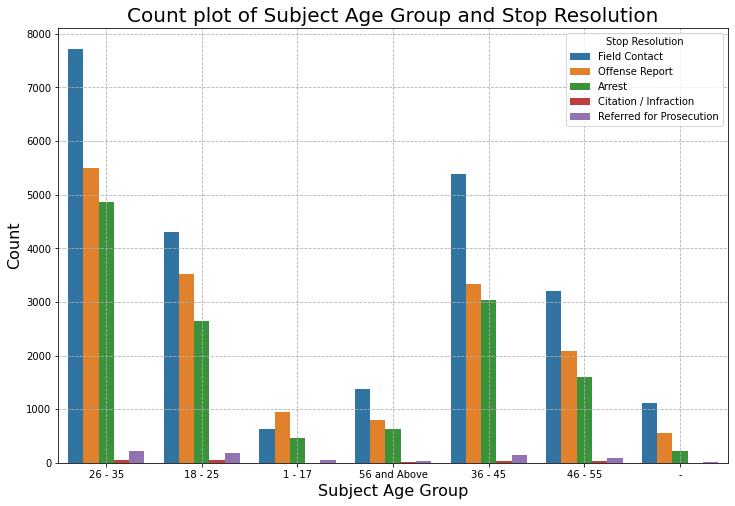

In [54]:
# function to describe categorical columns
def count_plot(df, x_col, y_col):
    # Plot the count plot
    plt.figure(figsize=(12,8))
    sns.countplot(x=x_col, hue=y_col, data=df)

    # Label the x and y axis
    plt.title("Count plot of " + x_col + " and " + y_col, fontsize=20)
    plt.xlabel(x_col, fontsize=16)
    plt.ylabel("Count", fontsize=16)

    # Add grid
    plt.grid(True, linestyle='--')
    
    # Show the plot
    plt.show()

# call the function 
count_plot(Tery_stops_df, "Subject Age Group", "Stop Resolution" )

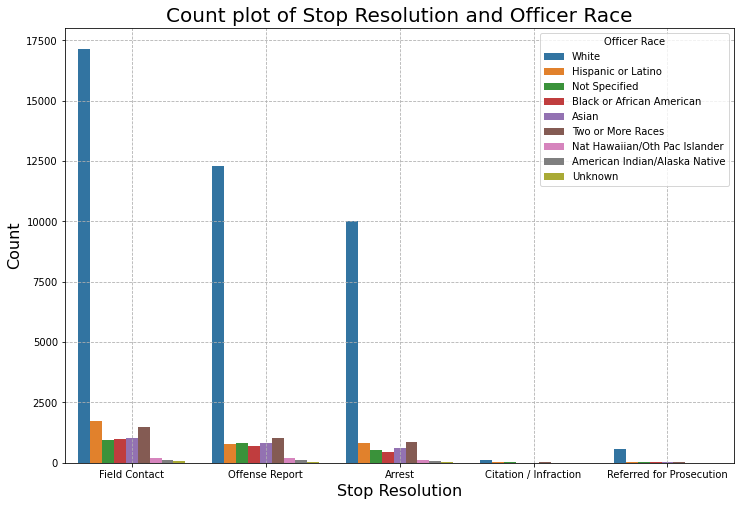

In [55]:
count_plot(Tery_stops_df, "Stop Resolution","Officer Race")

### 4.4 Data Cleaning

Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps
* handling missing values
* removing duplicates
* correcting data format
* transforming variables to make the data ready for modelling and predictions.

In [56]:
# check to see type of data
Tery_stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54873 entries, 0 to 54872
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         54873 non-null  object
 1   Subject ID                54873 non-null  int64 
 2   GO / SC Num               54873 non-null  int64 
 3   Terry Stop ID             54873 non-null  int64 
 4   Stop Resolution           54873 non-null  object
 5   Weapon Type               54873 non-null  object
 6   Officer ID                54873 non-null  object
 7   Officer YOB               54873 non-null  int64 
 8   Officer Gender            54873 non-null  object
 9   Officer Race              54873 non-null  object
 10  Subject Perceived Race    54873 non-null  object
 11  Subject Perceived Gender  54873 non-null  object
 12  Reported Date             54873 non-null  object
 13  Reported Time             54873 non-null  object
 14  Initial Call Type     

In [57]:
# call the function  
print("Summary:")
columns_dtypes(Tery_stops_df)

Summary:
Numerical columns: 4
Categorical columns: 19


#### 4.4.1. Missing and Duplicate Values
 a function to check duplicates and null

In [58]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # create result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() !=0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with null count of")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() !=0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

check_duplicates_missing(Tery_stops_df)


Officer squad is the column with null count of

No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.00,0,0.0
Subject ID,0.00,0,0.0
GO / SC Num,0.00,0,0.0
Terry Stop ID,0.00,0,0.0
Stop Resolution,0.00,0,0.0
Weapon Type,0.00,0,0.0
Officer ID,0.00,0,0.0
Officer YOB,0.00,0,0.0
Officer Gender,0.00,0,0.0
Officer Race,0.00,0,0.0


#### 4.4.1.1. Investigate the null values

In [59]:
# check the missing column
squad_df = Tery_stops_df["Officer Squad"].value_counts().rename_axis('unique_values').reset_index(name='counts')
squad_df.tail(7)

,unique_values,counts
146,ROBBERY SQUAD B,1
147,ZOLD CRIME ANALYSIS UNIT - ANALYSTS,1
148,HUMAN TRAFFICKING - SQUAD A,1
149,COMMUNITY OUTREACH - SPECIAL PROJECTS DETAIL,1
150,ROBBERY SQUAD A,1
151,DV SQUAD C - ELDER ABUSE,1
152,COMMUNITY OUTREACH - YOUTH VIOLENCE -SCHOOLS D...,1


In [60]:
# count the number of stop resolutions by squad
print("Missing informaion vs the squad of the officer:")
squad_counts = Tery_stops_df.groupby("Officer Squad")["Stop Resolution"].value_counts().unstack()
squad_counts

Missing informaion vs the squad of the officer:


Stop Resolution,Arrest,Citation / Infraction,Field Contact,Offense Report,Referred for Prosecution
Officer Squad,,,,,
ALTERNATIVE RESPONSE TEAM (ART) - SQUAD A,NaN,NaN,NaN,1.0,NaN
ALTERNATIVE RESPONSE TEAM (ART) - SQUAD B,NaN,NaN,NaN,1.0,NaN
AUTO THEFT,2.0,NaN,1.0,1.0,NaN
BURG/THEFT/JUV - EAST,NaN,NaN,1.0,4.0,NaN
BURG/THEFT/JUV - NORTH,NaN,NaN,2.0,1.0,NaN
...,...,...,...,...,...
WEST PCT OPS - BURG/THEFT,NaN,NaN,NaN,3.0,NaN
WEST PCT OPS - CPT,6.0,NaN,13.0,33.0,NaN
WEST PCT OPS - MOUNTED PATROL,2.0,NaN,4.0,2.0,1.0


##### compare officer ID vs the missing information

In [61]:
#get the null dataframe
null_data = Tery_stops_df[Tery_stops_df.isnull().any(axis=1)]


In [62]:
# group the data by Officer ID
grouped = null_data.groupby('Officer ID')

# count the number of missing values in each group
missing_counts = grouped.apply(lambda x: x.isnull().sum())

# get the columns with missing values
missing_columns = missing_counts.columns[missing_counts.sum() > 0]

# create a new dataframe with the missing counts for each Officer ID
missing_df = missing_counts[missing_columns].reset_index()

# rename the columns for clarity
missing_df.columns = ['Officer ID', 'Missing Count']

# compare the number of missing values for each Officer ID
missing_df.sort_values(by='Missing Count', ascending=False).head(7)


,Officer ID,Missing Count
713,8646,314
238,7456,197
714,8647,188
754,8689,184
758,8696,182
745,8680,173
749,8684,142


In [63]:
# # call count plot functions
# count_plot(missing_df, "Officer ID", "Missing Count")

#### What was the outcome of the stops with missing information?.

In [64]:
# group the data by Officer ID and Stop Resolution
grouped = null_data.groupby(["Officer ID", "Stop Resolution"]).size().reset_index(name="Count")

# preview
grouped.head(5)

,Officer ID,Stop Resolution,Count
0,-,Arrest,3
1,-,Field Contact,19
2,-,Offense Report,2
3,-9,Arrest,1
4,-9,Field Contact,4


#### 4.4.1.2. Handling Null
>I will drop the Officer Squad column because the null values equals to **37.78%**  and the information it contains I will not use for my analysis.

In [65]:
# drop the Officer Squad column
No_null_df = Tery_stops_df.drop(["Officer Squad"], axis=1)

# check to confirm id data still has missing values 
check_duplicates_missing(No_null_df)

No column with missing values
No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.0,0,0.0
Subject ID,0.0,0,0.0
GO / SC Num,0.0,0,0.0
Terry Stop ID,0.0,0,0.0
Stop Resolution,0.0,0,0.0
Weapon Type,0.0,0,0.0
Officer ID,0.0,0,0.0
Officer YOB,0.0,0,0.0
Officer Gender,0.0,0,0.0
Officer Race,0.0,0,0.0


>Data all good the null values handled

#### 4.4.2. Correcting Data Format
This are the steps taken in correcting data format:
* Update the Stop Resolution column to either be arrested (1) or not arrested (0)
* Change the date column to datetime
* Group weapons into firearms vs. non-firearms vs. no weapon:
* Change Officer year of bith to give the officer age
* To categorize this time as either "daytime" or "nighttime"
* Drop columns that we are not going to need
* Converting categorical data to numeric format through label encoder

##### * Fix structural error

In [66]:
# replace with new stings
No_null_df = No_null_df.replace(["-"], "No Information")
No_null_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,2016-10-31T00:00:00Z,01:23:00.0000000,No Information,No Information,No Information,N,N,No Information,No Information,No Information
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,2018-09-22T00:00:00Z,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,2017-10-27T00:00:00Z,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,N,N,East,C,C1


##### * Update the Stop Resolution column to binary

In [67]:
# get unique values in stop resolution
stop_resolution_unique = set(No_null_df["Stop Resolution"])
print(f"before:\n{stop_resolution_unique}")

# update to binary the colum values
values = ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution']
conversion_dict = {val: 1 if val == 'Arrest' else 0 for val in values}

# update column in data frame
No_null_df["Stop Resolution"] = No_null_df["Stop Resolution"].map(conversion_dict)
print()
# check data type after update
new_stop_resolution_unique = set(No_null_df["Stop Resolution"])
print(f"after:\n{new_stop_resolution_unique}")

before:
{'Arrest', 'Referred for Prosecution', 'Field Contact', 'Offense Report', 'Citation / Infraction'}

after:
{0, 1}


##### * Change the Reported Date column from object to datetime .

The data description, Reported Date, is the date the report was filed in the Records Management System (RMS). Not necessarily the date of the stop, but generally within one day.
Convert to date time so that I checked how different days and years affected the targert column

In [68]:
# convert to datetime type
No_null_df['Reported Date'] = pd.to_datetime(No_null_df['Reported Date'])

# extract day
No_null_df['Day'] = No_null_df['Reported Date'].dt.day
# extract year
No_null_df['Year'] = No_null_df['Reported Date'].dt.year

#
No_null_df['Month'] = No_null_df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})


>There are columns for the day, month and year for each of the Terry-stops in te datammset

##### * Group weapons

##### What is a firearm?

>The general classification of firearms can be based on the following criteria: Level of harm they produce. Lethal - designed with the intent to eventually kill the target. Non-lethal - designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries.

This column shwed a list of the type weapons if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

In [69]:
# gets weapons category
weapons = list(dict(No_null_df['Weapon Type'].value_counts()).keys())
print("These are the weapon classes :")
weapons

These are the weapon classes :


['None',
 'No Information',
 'Lethal Cutting Instrument',
 'Knife/Cutting/Stabbing Instrument',
 'Handgun',
 'Blunt Object/Striking Implement',
 'Firearm Other',
 'Firearm',
 'Club, Blackjack, Brass Knuckles',
 'Other Firearm',
 'Mace/Pepper Spray',
 'Firearm (unk type)',
 'Taser/Stun Gun',
 'None/Not Applicable',
 'Fire/Incendiary Device',
 'Club',
 'Rifle',
 'Shotgun',
 'Automatic Handgun',
 'Personal Weapons (hands, feet, etc.)',
 'Brass Knuckles',
 'Blackjack']

I will convert the firearm category to binary, it will be Firearm is designed with the intent to eventually kill the target and Non Firearm if designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries. 

In [70]:
# map the new values to the weapon found column
No_null_df['Weapon Type'] = No_null_df['Weapon Type'].map(
{
 'None': 'Non Firearm',
 '-': 'Non Firearm',
 'Lethal Cutting Instrument': 'Non Firearm',
 'Knife/Cutting/Stabbing Instrument': 'Non Firearm',
 'Handgun': 'Firearm',
 'Blunt Object/Striking Implement': 'Non Firearm',
 'Firearm Other': 'Firearm',
 'Firearm': 'Firearm',
 'Club, Blackjack, Brass Knuckles': 'Non Firearm',
 'Other Firearm': 'Firearm',
 'Mace/Pepper Spray': 'Non Firearm',
 'Firearm (unk type)': 'Firearm',
 'Taser/Stun Gun': 'Non Firearm',
 'None/Not Applicable': 'Non Firearm',
 'Fire/Incendiary Device': 'Non Firearm',
 'Club': 'Non Firearm',
 'Rifle': 'Firearm',
 'Shotgun': 'Firearm',
 'Automatic Handgun': 'Firearm',
 'Personal Weapons (hands, feet, etc.)': 'Non Firearm',
 'Brass Knuckles': 'Non Firearm',
 'Blackjack': 'Non Firearm'
 })

Most of the weapons were classified as Non Firearm

##### * Get  officer age using YOB

In [71]:
# get age by subtracting from current year 
No_null_df['Officer Age'] = 2023 - No_null_df["Officer YOB"]

# preview
No_null_df[["Stop Resolution", "Officer Age"]].tail(7)

,Stop Resolution,Officer Age
54866,0,44
54867,0,60
54868,0,36
54869,0,37
54870,1,40
54871,0,59
54872,0,54


##### * Convert time to binary

In [72]:
# function to split time column and extract hour and group as night or dat
def categorize_time(column):
    def categorize_time_helper(time):
        hour = int(time.split(":")[0])
        if hour >= 6 and hour < 18:
            return "Day"
        else:
            return "Night"

    return column.apply(categorize_time_helper)

No_null_df["Time Category"] = categorize_time(No_null_df["Reported Time"])    

In [73]:
# ages considered as categorical, convert oficcer age  column to object
No_null_df["Officer Age"] = No_null_df["Officer Age"].astype("object")


##### Drop irrelevant columns

In [74]:
# columns to be dropped
irrelevant_columns = [
    'Subject ID',
    'GO / SC Num',
    'Terry Stop ID',
    'Officer YOB',
    'Reported Date',
    'Officer ID',
    'Officer Gender',
    'Officer Race',
    'Subject Perceived Race',
    'Subject Perceived Gender',
    'Reported Time',
    'Final Call Type',
    'Call Type',
    'Initial Call Type',
    'Officer YOB',
    'Day'
    
]

df = No_null_df.drop(irrelevant_columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54873 entries, 0 to 54872
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject Age Group  54873 non-null  object
 1   Stop Resolution    54873 non-null  int64 
 2   Weapon Type        35956 non-null  object
 3   Arrest Flag        54873 non-null  object
 4   Frisk Flag         54873 non-null  object
 5   Precinct           54873 non-null  object
 6   Sector             54873 non-null  object
 7   Beat               54873 non-null  object
 8   Year               54873 non-null  int64 
 9   Month              54873 non-null  object
 10  Officer Age        54873 non-null  object
 11  Time Category      54873 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.0+ MB


## 4.5. Exploratory Data Analysis

The dataset has an additional columns, during data processing I feature engineered columns to help in better understanding of any underlying patterns that would help make better predictions.

There are some columns that I will not use in my analysis and I drop the at this point, part of  final preparation before modelling.I'd like to point out that I'll be removing the subject's race and gender because these are only perceived by the officer and thus their accuracy cannot be trusted.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

def univariate_analysis(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'int64' or dataframe[column].dtype == 'float64':
            plt.hist(dataframe[column], bins=10, edgecolor='black')
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(True, linestyle='--')
            plt.show()
        elif dataframe[column].dtype == 'object':
            value_counts = dataframe[column].value_counts()
            plt.bar(value_counts.index, value_counts.values)
            plt.title(f'Bar chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.xticks(rotation=90)
            plt.grid(True, linestyle='--')
            plt.show()



##### Distribution of the data

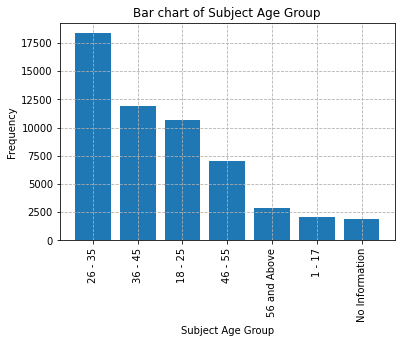

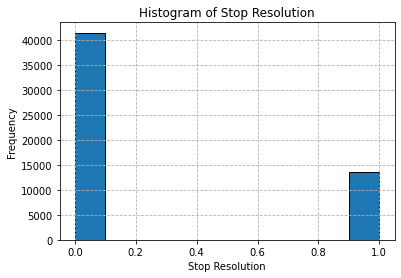

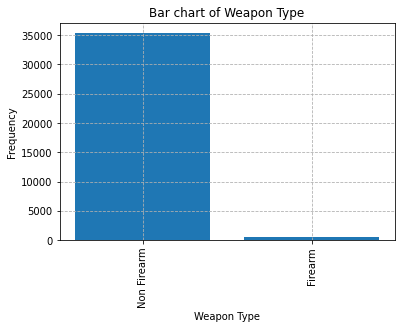

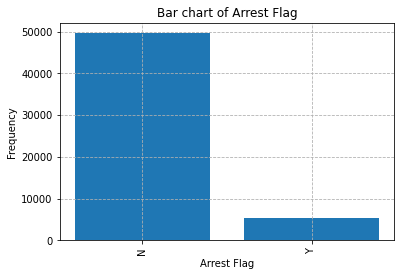

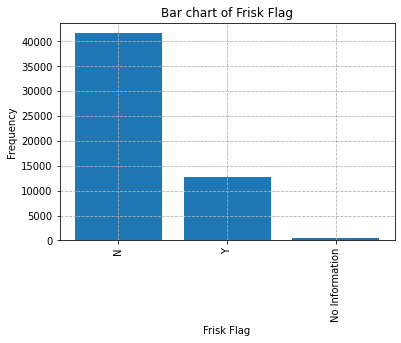

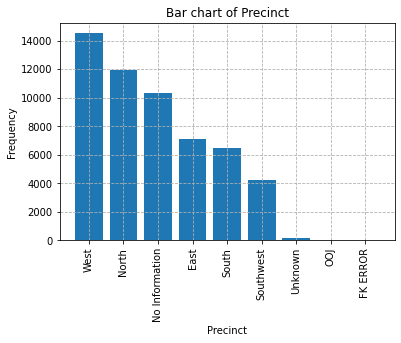

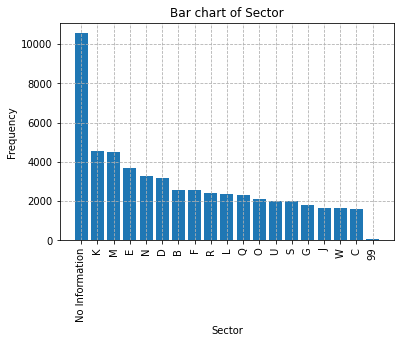

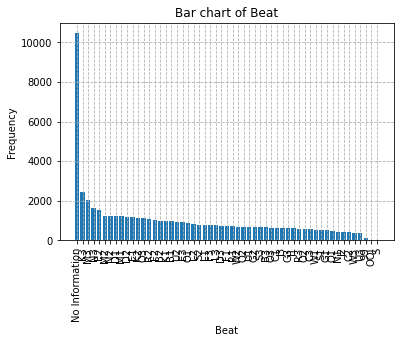

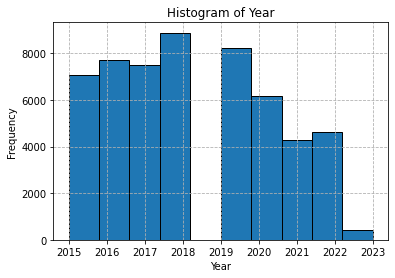

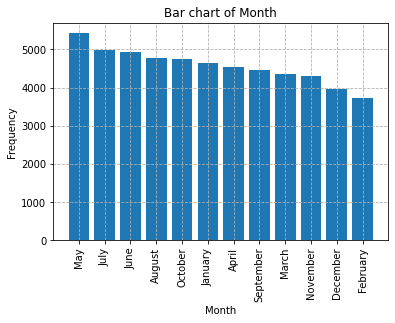

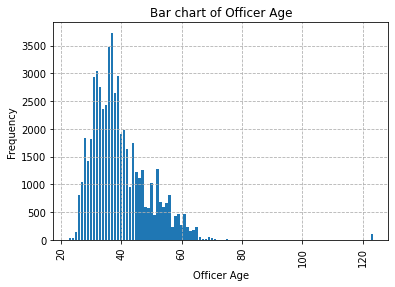

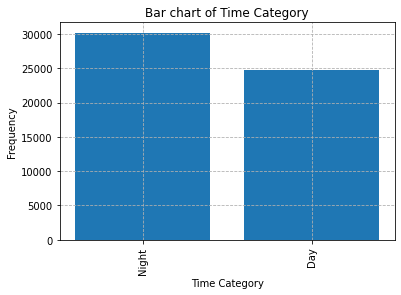

In [76]:
# calling our function
univariate_analysis(df)


##### Categorical columns

>Most subjects had weapon type not firearm.....m

>Most fire arms were during the night

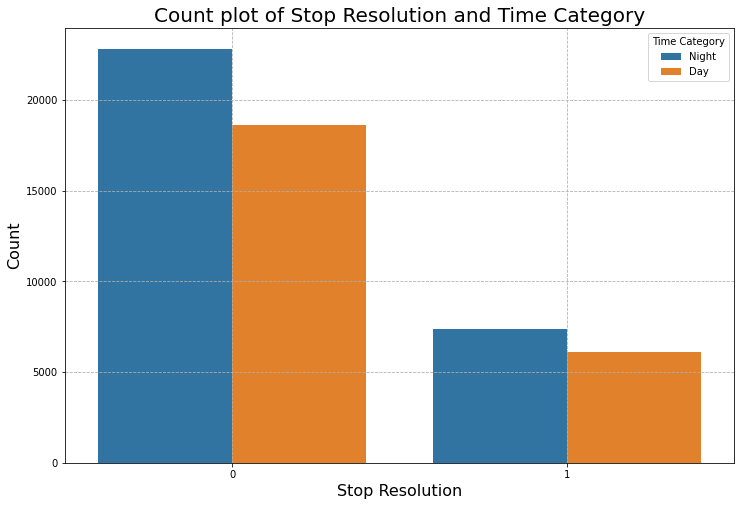

In [78]:
# calling the function
count_plot(df, "Stop Resolution", "Time Category")

>Most arrest were made at nigh

#### Data Prepocessing

In [83]:
# get categorical columns
cat_cols = df.select_dtypes(include='object')

# get numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])


In [84]:
cat_cols

,Subject Age Group,Weapon Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month,Officer Age,Time Category
0,26 - 35,Non Firearm,N,N,No Information,No Information,No Information,October,55,Night
1,18 - 25,Non Firearm,N,N,North,L,L2,September,32,Day
2,26 - 35,Non Firearm,N,N,East,C,C1,October,31,Day
3,1 - 17,NaN,Y,N,West,Q,Q3,March,36,Night
4,56 and Above,Non Firearm,N,N,No Information,No Information,No Information,January,48,Day
...,...,...,...,...,...,...,...,...,...,...
54868,26 - 35,Non Firearm,N,N,West,M,M1,June,36,Night
54869,26 - 35,Non Firearm,N,N,South,R,R1,May,37,Day
54870,18 - 25,Non Firearm,Y,Y,East,E,E2,September,40,Night
54871,26 - 35,Non Firearm,N,Y,North,U,U1,August,59,Night


###### Convert categorical columns using OneHotEncoding

In [85]:
# import relevant libraries
from sklearn.preprocessing import OneHotEncoder

# one-hot encode the training data
ohe = OneHotEncoder()

# get dummies
ohe.fit(cat_cols)
dums = ohe.transform(cat_cols).toarray()

# create a dataframe with both training and testing data to be used later:
cat_dums = pd.DataFrame(dums, columns=ohe.get_feature_names_out(cat_cols.columns))
num_cols


final_df= pd.concat([cat_dums, num_cols], axis=1)

# preview final data set for modelling
final_df.tail(3)

,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Subject Age Group_No Information,Weapon Type_Firearm,Weapon Type_Non Firearm,Weapon Type_nan,...,Officer Age_71,Officer Age_72,Officer Age_74,Officer Age_75,Officer Age_77,Officer Age_123,Time Category_Day,Time Category_Night,Stop Resolution,Year
54870,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2021
54871,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2019
54872,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2018


In [86]:
# set predictors
X  = final_df.drop(["Stop Resolution"], axis=1)

# set target
y = final_df[["Stop Resolution"]]

In [88]:
# preview predictors
X.tail(4)

,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Subject Age Group_No Information,Weapon Type_Firearm,Weapon Type_Non Firearm,Weapon Type_nan,...,Officer Age_70,Officer Age_71,Officer Age_72,Officer Age_74,Officer Age_75,Officer Age_77,Officer Age_123,Time Category_Day,Time Category_Night,Year
54869,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017
54870,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2021
54871,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019
54872,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018


In [89]:
# preiview target
y.tail(4)

,Stop Resolution
54869,0
54870,1
54871,0
54872,0


##### Split datasets

In [90]:
# import relevant library
from sklearn.model_selection import train_test_split

# perform the tarin split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

>Data was split on the 80% training while test at 20%

##### Correlation with the Target colum

# 5.0. Modelling

>Is this a classification task? 
What models will we try?
How do we deal with overfitting?
Do we need to use regularization or not?
What sort of validation strategy will we be using to check that our model works well on unseen data?
What loss functions will we use?
What threshold of performance do we consider as successful?

Binary classification is a type of machine learning problem where the goal is to predict one of two possible outcomes (classes) for each input sample. The two classes are here are  represented by labels, "1" and "0".
I will build four models and pick the best based on the accuracy metrics.
1. Baseline model --> Logistic Regression
2. Second Model --> k-Nearest Neighbors (k-NN)
3. Third Model --> Decision Trees
4. Fourh --> XGbost/Random Forest


The the accuracy of the model's predictions is  to compare its predictions to the true class labels for a set of test data. Evaluation metrics include accuracy, precision, recall, and F1-score.

### Baseline Model
    Logistic REgression Model

In [91]:
# import relevant libraries
from sklearn.linear_model import LogisticRegression

# baseline classifier
Baseline = LogisticRegression(max_iter=300)

# fit the model
Baseline.fit(X_train, y_train.values.ravel())

# get predictions
y_pred = Baseline.predict(X_test)

### Evaluate Baseline model on test data

In [93]:
# baseline model score
print(Baseline.score(X_train, y_train))


0.8492547056903492


/home/munyao/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


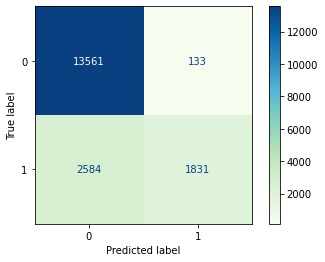

In [96]:
# import relevant libraries
from sklearn import metrics

# confusion matrix
confusion_base = metrics.plot_confusion_matrix(Baseline, X_test, y_test, cmap= "GnBu")

### Evaluate Baseline on unseen data

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# get predictons
prob = Baseline.predict_proba(X_test)

predicted= Baseline.predict(X_test)

# baseline model accuracy:
print("Baseline: ", accuracy_score(y_test, predicted)*100,'%')

# classification report:
print(classification_report(y_test, predicted))

Baseline:  84.99641062455133 %
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     13694
           1       0.93      0.41      0.57      4415

    accuracy                           0.85     18109
   macro avg       0.89      0.70      0.74     18109
weighted avg       0.86      0.85      0.83     18109



#### function to evaluate model perfomance

### Second Model 
    k-Nearest Neighbors (k-NN)

In [99]:
# import relevant libraries
from sklearn.neighbors import KNeighborsClassifier

# model
knn_model2 = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn_model2.fit(X_train, y_train)

# make predictions
pred_y = knn_model2.predict(X_test)

# classification report:
print(classification_report(y_test, pred_y))

/home/munyao/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.87      0.92      0.89     13694
           1       0.69      0.58      0.63      4415

    accuracy                           0.83     18109
   macro avg       0.78      0.75      0.76     18109
weighted avg       0.83      0.83      0.83     18109



/home/munyao/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


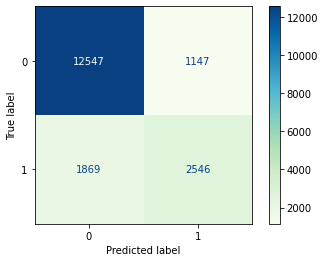

In [100]:
# confusion matrix
confusion_base = metrics.plot_confusion_matrix(knn_model2, X_test, y_test, cmap= "GnBu")

### Third Model 
    Decision Trees

In [103]:
# import relevant libraries
from sklearn.tree import DecisionTreeClassifier

# model
dtc_model3 = DecisionTreeClassifier()

#fit the model with training data
dtc_model3.fit(X_train, y_train)

# get predictions from model
dtc_pred = dtc_model3.predict(X_test)

# classification report:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     13694
           1       0.67      0.66      0.66      4415

    accuracy                           0.84     18109
   macro avg       0.78      0.78      0.78     18109
weighted avg       0.84      0.84      0.84     18109



#### Random forest Model

In [105]:
# import relevant libraries
from sklearn.ensemble import RandomForestClassifier

# class model
rfc_model4 = RandomForestClassifier()

# fit the model with training set
rfc_model4.fit(X_train, y_train)

# test model with unseen data
rfc_preds = rfc_model4.predict(X_test)


# classification report:
print(classification_report(y_test, rfc_preds))

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13694
           1       0.81      0.57      0.67      4415

    accuracy                           0.86     18109
   macro avg       0.84      0.76      0.79     18109
weighted avg       0.86      0.86      0.85     18109



/home/munyao/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


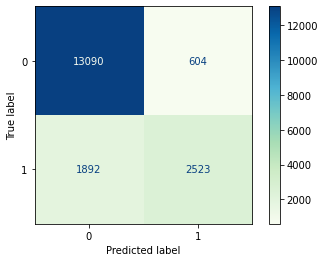

In [107]:
# confusion matrix
confusion_base = metrics.plot_confusion_matrix(rfc_model4, X_test, y_test, cmap= "GnBu")

### Naive Bayes

/home/munyao/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.97      0.29      0.45     13694
           1       0.31      0.98      0.47      4415

    accuracy                           0.46     18109
   macro avg       0.64      0.63      0.46     18109
weighted avg       0.81      0.46      0.45     18109



/home/munyao/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


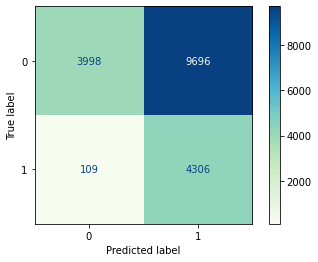

In [110]:
# import rwlwvant libraries
from sklearn.naive_bayes import GaussianNB

# model class
gnb_model5 = GaussianNB()

# fit model with train set
gnb_model5.fit(X_train,y_train)

# make predictions
gnb_preds = gnb_model5.predict(X_test)

# classification report:
print(classification_report(y_test, gnb_preds))

# confusion matrix
confusion_base = metrics.plot_confusion_matrix(gnb_model5, X_test, y_test, cmap= "GnBu")

In [ ]:
categorical_df.corr().T

In [ ]:
columns_dtypes(Tery_stops_df)